<center><h1><b><font size="6">Anomaly Detection</font></b></h1></center>

## Imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
%matplotlib inline

## Load dataset

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Create a Box Plot 

<Axes: >

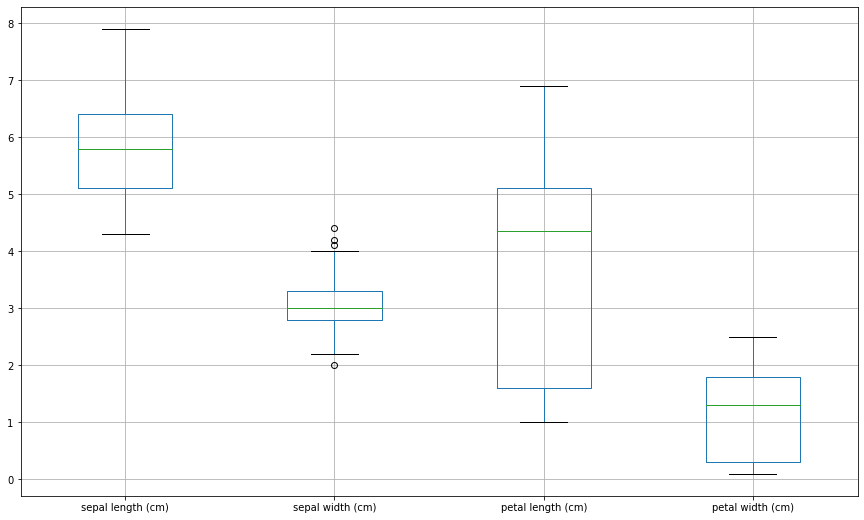

In [3]:
df.boxplot(figsize=(15, 9))

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
Q1 = df["sepal width (cm)"].quantile(0.25)
Q3 = df["sepal width (cm)"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.5


## Upper Limit Outliers

In [7]:
ub = Q3 + 1.5*IQR
ub

4.05

### look at the outliers

In [8]:
df[df["sepal width (cm)"] > ub]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2


In [9]:
df2 = df[df["sepal width (cm)"] < ub]
df2.shape

(147, 4)

## Lower Limit Outliers

In [10]:
lb = Q1 - 1.5*IQR
df2 = df2[df2["sepal width (cm)"] > lb]
df2.shape

(146, 4)

<Axes: >

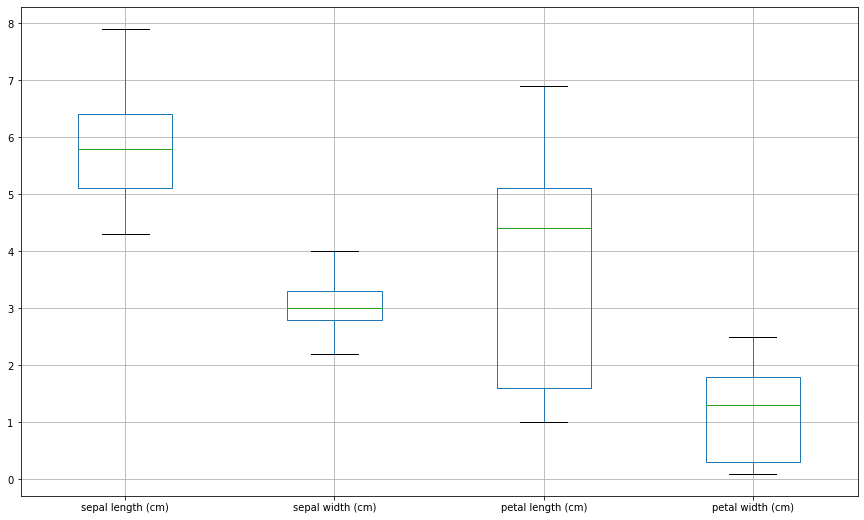

In [12]:
df2.boxplot(figsize=(15, 9))